In [26]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [3]:
data = pd.read_csv(
    "F:\Learning\Bsc.IT(Hon)\Research Project\ShortTerm Model\Data\Lycium Mod.csv"
    ,low_memory=False
)

In [4]:
data.shape

(77094, 20)

### Changing Column names

In [5]:
data.rename(columns={'urn:ogc:def:parameter:x-istsos:1.0:time:iso8601':'DateTime',
                     'urn:ogc:def:procedure':'Station',
                     'urn:ogc:def:parameter:x-istsos:1.0:air:temperature:internal':'air-temperature-internal',
                     'urn:ogc:def:parameter:x-istsos:1.0:air:temperature:internal:qualityIndex':'air-temperature-internal_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:soil:moisture':'soil-moisture',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:soil:moisture:qualityIndex':'soil-moisture_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:solar:light':'light',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:solar:light:qualityIndex':'light_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:pressure':'air-pressure',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:pressure:qualityIndex':'air-pressure_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:humidity:relative':'air-humidity-relative',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:humidity:relative:qualityIndex':'air-humidity-relative_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:temperature':'air-temperature',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:temperature:qualityIndex':'air-temperature_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:rainfall':'air-rainfall',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:rainfall:qualityIndex':'air-rainfall_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:wind:direction':'air-wind-direction',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:wind:direction:qualityIndex':'air-wind-direction_QI',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:wind:velocity':'air-wind-velocity',
                     'urn:ogc:def:parameter:x-istsos:1.0:meteo:air:wind:velocity:qualityIndex':'air-wind-velocity_QI',
                    }, 
                 inplace=True)


In [6]:
data = data.drop("air-temperature-internal_QI", axis=1)
data = data.drop("soil-moisture_QI", axis=1)
data = data.drop("light_QI", axis=1)
data = data.drop("air-pressure_QI", axis=1)
data = data.drop("air-humidity-relative_QI", axis=1)
data = data.drop("air-temperature_QI", axis=1)
data = data.drop("air-rainfall_QI", axis=1)
data = data.drop("air-wind-direction_QI", axis=1)
data = data.drop("air-wind-velocity_QI", axis=1)

In [7]:
data.tail(5)

,DateTime,Station,air-temperature-internal,soil-moisture,light,air-pressure,air-humidity-relative,air-temperature,air-rainfall,air-wind-direction,air-wind-velocity
77089,2019-10-18T23:08:06+05:30,LYCEUM_MOD,24,0,0,995.71,77.59,22.94,0,0,0
77090,2019-10-18T23:20:02+05:30,LYCEUM_MOD,23,0,0,995.72,78.57,22.88,0,-999.99,0
77091,2019-10-18T23:30:00+05:30,LYCEUM_MOD,23,0,0,995.68,78.37,22.95,0,0,0
77092,2019-10-18T23:40:03+05:30,LYCEUM_MOD,23,0,0,995.63,77.19,22.92,0,-999.99,0
77093,2019-10-18T23:50:01+05:30,LYCEUM_MOD,23,0,0,995.64,77.87,22.82,0,-999.99,0


In [8]:
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')
data['DateTime'] = data['DateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [9]:
data.dtypes

DateTime                    object
Station                     object
air-temperature-internal    object
soil-moisture               object
light                       object
air-pressure                object
air-humidity-relative       object
air-temperature             object
air-rainfall                object
air-wind-direction          object
air-wind-velocity           object
dtype: object

In [10]:
data['air-temperature-internal'] = pd.to_numeric(data['air-temperature-internal'], errors='coerce')
data['soil-moisture'] = pd.to_numeric(data['soil-moisture'], errors='coerce')
data['light'] = pd.to_numeric(data['light'], errors='coerce')
data['air-pressure'] = pd.to_numeric(data['air-pressure'], errors='coerce')
data['air-humidity-relative'] = pd.to_numeric(data['air-humidity-relative'], errors='coerce')
data['air-temperature'] = pd.to_numeric(data['air-temperature'], errors='coerce')
data['air-rainfall'] = pd.to_numeric(data['air-rainfall'], errors='coerce')
data['air-wind-direction'] = pd.to_numeric(data['air-wind-direction'], errors='coerce')
data['air-wind-velocity'] = pd.to_numeric(data['air-wind-velocity'], errors='coerce')

In [11]:
data.dtypes

DateTime                     object
Station                      object
air-temperature-internal    float64
soil-moisture               float64
light                       float64
air-pressure                float64
air-humidity-relative       float64
air-temperature             float64
air-rainfall                float64
air-wind-direction          float64
air-wind-velocity           float64
dtype: object

In [12]:
data.head()

,DateTime,Station,air-temperature-internal,soil-moisture,light,air-pressure,air-humidity-relative,air-temperature,air-rainfall,air-wind-direction,air-wind-velocity
0,2018-03-29 12:20:52,LYCEUM_MOD,35.0,63.0,347.0,997.07,50.45,34.94,0.0,315.0,0.0
1,2018-03-29 12:25:07,LYCEUM_MOD,35.0,62.0,0.0,996.94,44.33,34.81,0.0,45.0,0.0
2,2018-03-29 12:30:00,LYCEUM_MOD,35.0,61.0,0.0,996.78,39.29,35.94,0.0,45.0,0.0
3,2018-03-29 12:35:03,LYCEUM_MOD,36.0,61.0,0.0,996.63,43.26,35.13,0.0,315.0,0.0
4,2018-03-29 12:40:04,LYCEUM_MOD,36.0,60.0,0.0,996.45,40.05,35.75,0.0,180.0,0.0


### Ploting Data

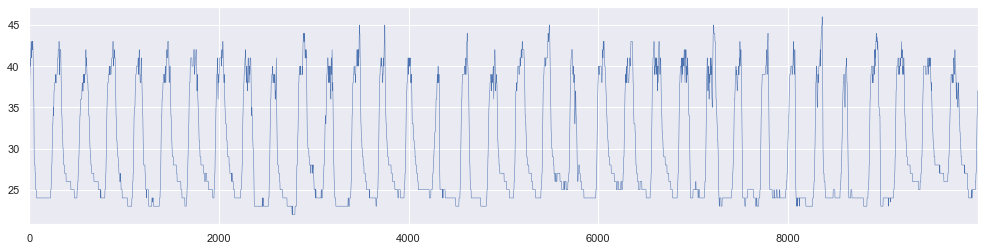

In [13]:
sns.set(rc={'figure.figsize':(17, 4)})
data[0:10000]['air-temperature-internal'].plot(linewidth=0.5);

In [14]:
data.iloc[:,2:]

,air-temperature-internal,soil-moisture,light,air-pressure,air-humidity-relative,air-temperature,air-rainfall,air-wind-direction,air-wind-velocity
0,35.0,63.0,347.0,997.07,50.45,34.94,0.0,315.00,0.0
1,35.0,62.0,0.0,996.94,44.33,34.81,0.0,45.00,0.0
2,35.0,61.0,0.0,996.78,39.29,35.94,0.0,45.00,0.0
3,36.0,61.0,0.0,996.63,43.26,35.13,0.0,315.00,0.0
4,36.0,60.0,0.0,996.45,40.05,35.75,0.0,180.00,0.0
...,...,...,...,...,...,...,...,...,...
77089,24.0,0.0,0.0,995.71,77.59,22.94,0.0,0.00,0.0
77090,23.0,0.0,0.0,995.72,78.57,22.88,0.0,-999.99,0.0
77091,23.0,0.0,0.0,995.68,78.37,22.95,0.0,0.00,0.0
77092,23.0,0.0,0.0,995.63,77.19,22.92,0.0,-999.99,0.0


# Checking for null values

In [15]:
data.isnull().values.any() #looks like we don't have any nulls

True

In [16]:
print(data.isnull().sum())

DateTime                      0
Station                       0
air-temperature-internal     32
soil-moisture                32
light                        32
air-pressure                 84
air-humidity-relative        73
air-temperature              32
air-rainfall                 32
air-wind-direction           38
air-wind-velocity           148
dtype: int64


In [17]:
data = data.interpolate()

In [18]:
print(data.isnull().sum())

DateTime                    0
Station                     0
air-temperature-internal    0
soil-moisture               0
light                       0
air-pressure                0
air-humidity-relative       0
air-temperature             0
air-rainfall                0
air-wind-direction          0
air-wind-velocity           0
dtype: int64


## Check for correlated columns

In [19]:
def plot_corr(df,size=11): 
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Yellow means that they are highly correlated.
                                           
    """
    corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks

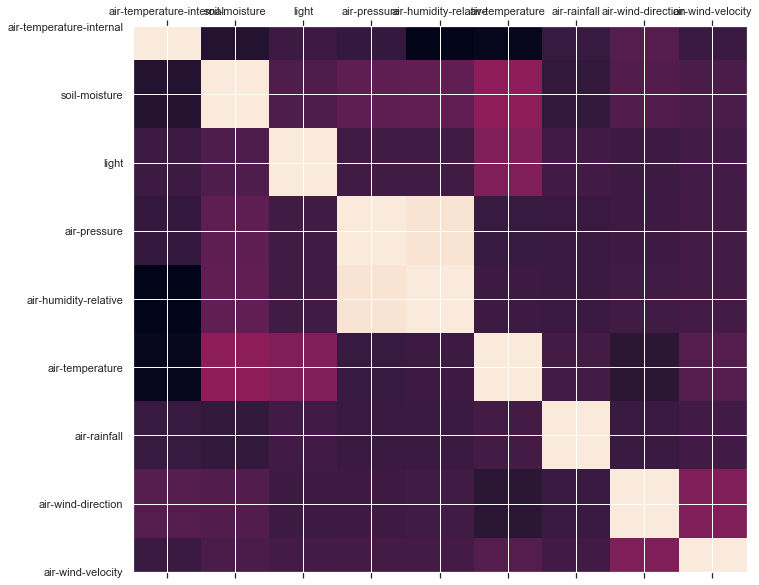

In [20]:
plot_corr(data)

In [21]:
data.corr()

,air-temperature-internal,soil-moisture,light,air-pressure,air-humidity-relative,air-temperature,air-rainfall,air-wind-direction,air-wind-velocity
air-temperature-internal,1.000000,-0.091914,-0.011751,-0.034199,-0.206229,-0.185189,-0.025550,0.060624,-0.019565
soil-moisture,-0.091914,1.000000,0.042507,0.093470,0.099005,0.223422,-0.045192,0.056985,0.028708
light,-0.011751,0.042507,1.000000,-0.002167,-0.002255,0.185596,0.001791,-0.008999,0.010988
air-pressure,-0.034199,0.093470,-0.002167,1.000000,0.979507,-0.025470,-0.020557,-0.003653,0.006323
air-humidity-relative,-0.206229,0.099005,-0.002255,0.979507,1.000000,-0.008797,-0.013272,-0.000434,0.008906
air-temperature,-0.185189,0.223422,0.185596,-0.025470,-0.008797,1.000000,0.008939,-0.065138,0.058575
air-rainfall,-0.025550,-0.045192,0.001791,-0.020557,-0.013272,0.008939,1.000000,-0.013525,0.001599
air-wind-direction,0.060624,0.056985,-0.008999,-0.003653,-0.000434,-0.065138,-0.013525,1.000000,0.185300
air-wind-velocity,-0.019565,0.028708,0.010988,0.006323,0.008906,0.058575,0.001599,0.185300,1.000000


In [22]:
del data['air-humidity-relative']

In [23]:
# check if it's been removed
data.head()

,DateTime,Station,air-temperature-internal,soil-moisture,light,air-pressure,air-temperature,air-rainfall,air-wind-direction,air-wind-velocity
0,2018-03-29 12:20:52,LYCEUM_MOD,35.0,63.0,347.0,997.07,34.94,0.0,315.0,0.0
1,2018-03-29 12:25:07,LYCEUM_MOD,35.0,62.0,0.0,996.94,34.81,0.0,45.0,0.0
2,2018-03-29 12:30:00,LYCEUM_MOD,35.0,61.0,0.0,996.78,35.94,0.0,45.0,0.0
3,2018-03-29 12:35:03,LYCEUM_MOD,36.0,61.0,0.0,996.63,35.13,0.0,315.0,0.0
4,2018-03-29 12:40:04,LYCEUM_MOD,36.0,60.0,0.0,996.45,35.75,0.0,180.0,0.0


## Changing Index

In [24]:
data = data.set_index('DateTime')
data.index = pd.to_datetime(data.index)

In [25]:
data.head()

,Station,air-temperature-internal,soil-moisture,light,air-pressure,air-temperature,air-rainfall,air-wind-direction,air-wind-velocity
DateTime,,,,,,,,,
2018-03-29 12:20:52,LYCEUM_MOD,35.0,63.0,347.0,997.07,34.94,0.0,315.0,0.0
2018-03-29 12:25:07,LYCEUM_MOD,35.0,62.0,0.0,996.94,34.81,0.0,45.0,0.0
2018-03-29 12:30:00,LYCEUM_MOD,35.0,61.0,0.0,996.78,35.94,0.0,45.0,0.0
2018-03-29 12:35:03,LYCEUM_MOD,36.0,61.0,0.0,996.63,35.13,0.0,315.0,0.0
2018-03-29 12:40:04,LYCEUM_MOD,36.0,60.0,0.0,996.45,35.75,0.0,180.0,0.0


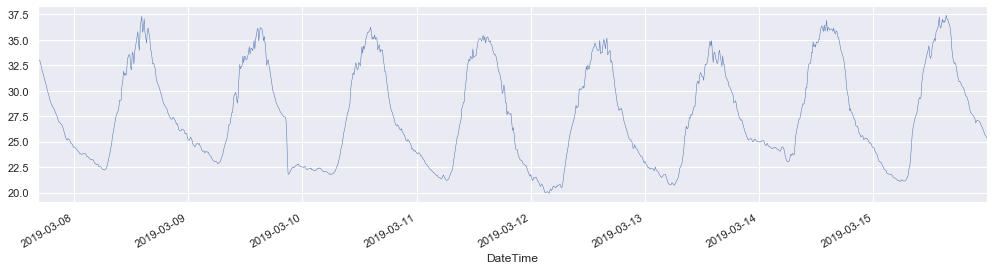

In [29]:
sns.set(rc={'figure.figsize':(17, 4)})
data['2019-03':'2019-03-15']['air-temperature'].plot(linewidth=0.5);

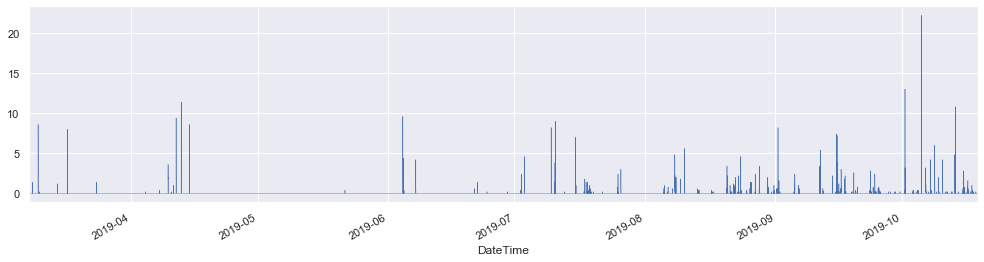

In [26]:
sns.set(rc={'figure.figsize':(17, 4)})
data['2019-03':'2019-10']['air-rainfall'].plot(linewidth=0.5);

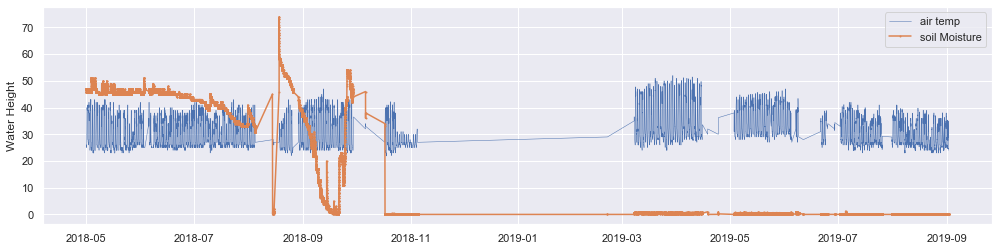

In [27]:
# Start and end of the date range to extract
start, end = '2018-05-01', '2019-09-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data.loc[start:end, 'air-temperature-internal'],
marker='', linestyle='-', linewidth=0.5, label='air temp')
ax.plot(data.loc[start:end, 'soil-moisture'],
marker='o', markersize=1, linestyle='-', label='soil Moisture')
ax.set_ylabel('Water Height')
ax.legend();

## Removing Outliers

In [28]:
# train kNN detector
# from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(data.iloc[:,2:])
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = clf.decision_scores_

In [29]:
y_train_scores = clf.decision_scores_

In [30]:
y_train_scores.shape

(77094,)

In [31]:
y_train_scores

array([2.51915566e+02, 6.96064652e+00, 5.57405597e+00, ...,
       1.30384048e-01, 2.19317122e-01, 2.13775583e-01])

In [32]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [33]:
outlier_datapoints = detect_outlier(data['air-rainfall'])

## Plotting Data

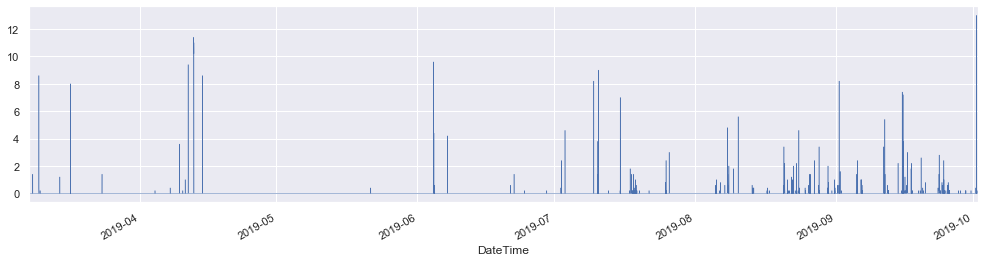

In [34]:
sns.set(rc={'figure.figsize':(17, 4)})
data['2019-03-01':'2019-10-01']['air-rainfall'].plot(linewidth=0.5);

## Extracing Rainfall Data

In [35]:
data['2019-03':'2019-10']['air-rainfall'].shape

(25660,)

In [36]:
Data_RainFall = data[['air-rainfall']].copy()

In [39]:
Data_RainFall.head()

,air-rainfall
DateTime,
2018-03-29 12:20:52,0.0
2018-03-29 12:25:07,0.0
2018-03-29 12:30:00,0.0
2018-03-29 12:35:03,0.0
2018-03-29 12:40:04,0.0


In [40]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['air-rainfall']
# Resample to weekly frequency, aggregating with mean
Data_RainFall_Hourly = Data_RainFall[data_columns].resample('H').sum()
Data_RainFall_Hourly.head(3)

,air-rainfall
DateTime,
2018-03-29 12:00:00,0.0
2018-03-29 13:00:00,0.0
2018-03-29 14:00:00,0.0


In [41]:
Data_RainFall_Hourly.to_pickle('F:\Learning\Bsc.IT(Hon)\Research Project\ShortTerm Model\Data\Lyceum_Filtered_Hourly.pkl')